In [1]:
from datetime import datetime, timedelta
from nsepy import get_history
import plotly.graph_objs as go
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import OrderedDict
import tensorflow as tf
print(tf.__version__)

2.0.0


In [2]:
start_train = datetime(2010,1,1)
end_train = datetime(2020,2,1)
nifty_raw = np.array(get_history('NIFTY',start_train,end_train,index=True)['Close'])
nifty_range = 1000 #np.max(nifty_raw) - np.min(nifty_raw)
nifty_train = nifty_raw/nifty_range
time_array = np.arange(0,len(nifty_train),1)

In [3]:
window_size = 20
batch_size = 16
shuffle_buffer_size = len(nifty_train)

In [4]:
def plot_series(time, series, format="-", start=0, end=None):
    plt.plot(time[start:end], series[start:end], format)
    plt.xlabel("Time")
    plt.ylabel("Value")
    plt.grid(True)

In [5]:
def windowed_dataset(series, window_size, batch_size, shuffle_buffer):
    dataset = tf.data.Dataset.from_tensor_slices(series)
    dataset = dataset.window(window_size + 1, shift=1, drop_remainder=True)
    dataset = dataset.flat_map(lambda window: window.batch(window_size + 1))
    dataset = dataset.shuffle(shuffle_buffer).map(lambda window: (window[:-1], window[-1][np.newaxis]))
    dataset = dataset.batch(batch_size).prefetch(1)
    return dataset

In [6]:
nifty_train
#for x,y in dataset:
#    print("x : ",x.numpy())
#    print("y : ",y.numpy())

array([ 5.2322 ,  5.2779 ,  5.2818 , ..., 12.0358 , 11.9621 , 11.66185])

In [7]:
tf.keras.backend.clear_session()
tf.random.set_seed(51)
np.random.seed(51)

dataset = windowed_dataset(nifty_train, window_size, batch_size=batch_size, shuffle_buffer=shuffle_buffer_size)

model = tf.keras.models.Sequential([
  tf.keras.layers.Lambda(lambda x: tf.expand_dims(x, axis=-1),
                      input_shape=[None]),
  tf.keras.layers.SimpleRNN(40, return_sequences=True),
  tf.keras.layers.SimpleRNN(20),
  tf.keras.layers.Dense(1)
])

optimizer = tf.keras.optimizers.SGD(lr=5e-5, momentum=0.97)
model.compile(loss=tf.keras.losses.Huber(),
              optimizer=optimizer,
              metrics=["mae"])
history = model.fit(dataset,epochs=400)

Epoch 1/400
156/156 [==============================] - 3s 17ms/step - loss: 4.0890 - mae: 4.5913
Epoch 2/400
156/156 [==============================] - 1s 8ms/step - loss: 1.5517 - mae: 2.0175
Epoch 3/400
156/156 [==============================] - 1s 7ms/step - loss: 1.4387 - mae: 1.9036
Epoch 4/400
156/156 [==============================] - 1s 7ms/step - loss: 1.3730 - mae: 1.8343
Epoch 5/400
156/156 [==============================] - 1s 7ms/step - loss: 0.9245 - mae: 1.3515
Epoch 6/400
156/156 [==============================] - 1s 7ms/step - loss: 0.3925 - mae: 0.6635
Epoch 7/400
156/156 [==============================] - 1s 8ms/step - loss: 0.1807 - mae: 0.4402
Epoch 8/400
156/156 [==============================] - 1s 8ms/step - loss: 0.0940 - mae: 0.3173
Epoch 9/400
156/156 [==============================] - 1s 8ms/step - loss: 0.0525 - mae: 0.2235
Epoch 10/400
156/156 [==============================] - 1s 8ms/step - loss: 0.0295 - mae: 0.1569
Epoch 11/400
156/156 [================

156/156 [==============================] - 1s 10ms/step - loss: 0.0040 - mae: 0.0670
Epoch 85/400
156/156 [==============================] - 2s 10ms/step - loss: 0.0038 - mae: 0.0651
Epoch 86/400
156/156 [==============================] - 2s 10ms/step - loss: 0.0040 - mae: 0.0667
Epoch 87/400
156/156 [==============================] - 2s 11ms/step - loss: 0.0039 - mae: 0.0659
Epoch 88/400
156/156 [==============================] - 2s 10ms/step - loss: 0.0038 - mae: 0.0651
Epoch 89/400
156/156 [==============================] - 2s 11ms/step - loss: 0.0038 - mae: 0.0655
Epoch 90/400
156/156 [==============================] - 2s 11ms/step - loss: 0.0038 - mae: 0.0654
Epoch 91/400
156/156 [==============================] - 2s 11ms/step - loss: 0.0038 - mae: 0.0658
Epoch 92/400
156/156 [==============================] - 2s 12ms/step - loss: 0.0042 - mae: 0.0693
Epoch 93/400
156/156 [==============================] - 2s 12ms/step - loss: 0.0038 - mae: 0.0659
Epoch 94/400
156/156 [===========

156/156 [==============================] - 2s 12ms/step - loss: 0.0036 - mae: 0.0630
Epoch 167/400
156/156 [==============================] - 2s 12ms/step - loss: 0.0035 - mae: 0.0626
Epoch 168/400
156/156 [==============================] - 2s 12ms/step - loss: 0.0037 - mae: 0.0644
Epoch 169/400
156/156 [==============================] - 2s 12ms/step - loss: 0.0035 - mae: 0.0633
Epoch 170/400
156/156 [==============================] - 2s 12ms/step - loss: 0.0035 - mae: 0.0625
Epoch 171/400
156/156 [==============================] - 2s 12ms/step - loss: 0.0035 - mae: 0.0627
Epoch 172/400
156/156 [==============================] - 2s 12ms/step - loss: 0.0035 - mae: 0.0631
Epoch 173/400
156/156 [==============================] - 2s 12ms/step - loss: 0.0034 - mae: 0.0617
Epoch 174/400
156/156 [==============================] - 2s 11ms/step - loss: 0.0035 - mae: 0.0628
Epoch 175/400
156/156 [==============================] - 2s 12ms/step - loss: 0.0036 - mae: 0.0636
Epoch 176/400
156/156 [=

156/156 [==============================] - 1s 9ms/step - loss: 0.0033 - mae: 0.0610
Epoch 250/400
156/156 [==============================] - 1s 9ms/step - loss: 0.0033 - mae: 0.0607
Epoch 251/400
156/156 [==============================] - 1s 9ms/step - loss: 0.0034 - mae: 0.0612
Epoch 252/400
156/156 [==============================] - 1s 9ms/step - loss: 0.0033 - mae: 0.0605
Epoch 253/400
156/156 [==============================] - 1s 9ms/step - loss: 0.0033 - mae: 0.0608
Epoch 254/400
156/156 [==============================] - 1s 9ms/step - loss: 0.0034 - mae: 0.0616
Epoch 255/400
156/156 [==============================] - 1s 9ms/step - loss: 0.0033 - mae: 0.0605
Epoch 256/400
156/156 [==============================] - 1s 9ms/step - loss: 0.0033 - mae: 0.0611
Epoch 257/400
156/156 [==============================] - 1s 9ms/step - loss: 0.0033 - mae: 0.0603
Epoch 258/400
156/156 [==============================] - 2s 10ms/step - loss: 0.0034 - mae: 0.0619
Epoch 259/400
156/156 [==========

156/156 [==============================] - 3s 21ms/step - loss: 0.0033 - mae: 0.0608
Epoch 333/400
156/156 [==============================] - 3s 21ms/step - loss: 0.0032 - mae: 0.0597
Epoch 334/400
156/156 [==============================] - 3s 22ms/step - loss: 0.0032 - mae: 0.0596
Epoch 335/400
156/156 [==============================] - 4s 25ms/step - loss: 0.0032 - mae: 0.0602
Epoch 336/400
156/156 [==============================] - 4s 24ms/step - loss: 0.0032 - mae: 0.0600
Epoch 337/400
156/156 [==============================] - 4s 24ms/step - loss: 0.0033 - mae: 0.0605
Epoch 338/400
156/156 [==============================] - 3s 22ms/step - loss: 0.0032 - mae: 0.0599
Epoch 339/400
156/156 [==============================] - 3s 21ms/step - loss: 0.0031 - mae: 0.0591
Epoch 340/400
156/156 [==============================] - 3s 21ms/step - loss: 0.0032 - mae: 0.0593
Epoch 341/400
156/156 [==============================] - 4s 23ms/step - loss: 0.0031 - mae: 0.0591
Epoch 342/400
156/156 [=

<Figure size 432x288 with 0 Axes>

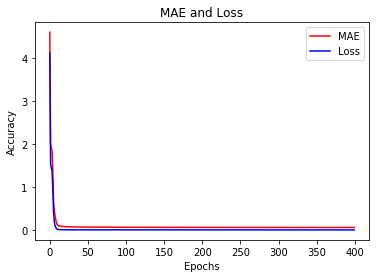

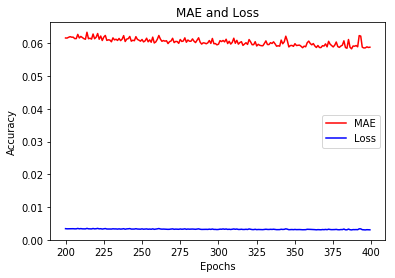

<Figure size 432x288 with 0 Axes>

In [8]:
import matplotlib.image  as mpimg
import matplotlib.pyplot as plt

mae=history.history['mae']
loss=history.history['loss']

epochs=range(len(loss)) # Get number of epochs

plt.plot(epochs, mae, 'r')
plt.plot(epochs, loss, 'b')
plt.title('MAE and Loss')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(["MAE", "Loss"])

plt.figure()

epochs_zoom = epochs[200:]
mae_zoom = mae[200:]
loss_zoom = loss[200:]

plt.plot(epochs_zoom, mae_zoom, 'r')
plt.plot(epochs_zoom, loss_zoom, 'b')
plt.title('MAE and Loss')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(["MAE", "Loss"])

plt.figure()

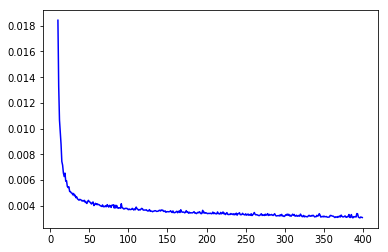

In [9]:
# Plot all but the first 10
loss = history.history['loss']
epochs = range(10, len(loss))
plot_loss = loss[10:]
plt.plot(epochs, plot_loss, 'b', label='Training Loss')
plt.show()

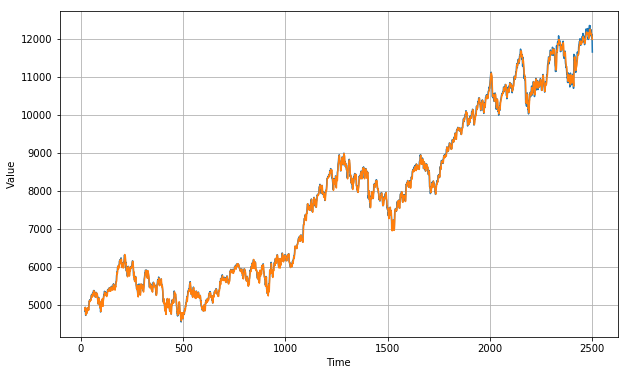

In [10]:
#Plotting training data and predictions

forecast = []
for time in range(len(nifty_train) - window_size):
    forecast.append(model.predict(nifty_train[time:time + window_size][np.newaxis]))

results = np.array(forecast)[:, 0, 0]*nifty_range

plt.figure(figsize=(10, 6))

plot_series(time_array[window_size:],nifty_raw[window_size:])
plot_series(time_array[window_size:], results)

In [11]:
print(tf.keras.metrics.mean_squared_error(nifty_raw[window_size:], results).numpy())
print(tf.keras.metrics.mean_absolute_error(nifty_raw[window_size:], results).numpy())

6141.2905
58.873734


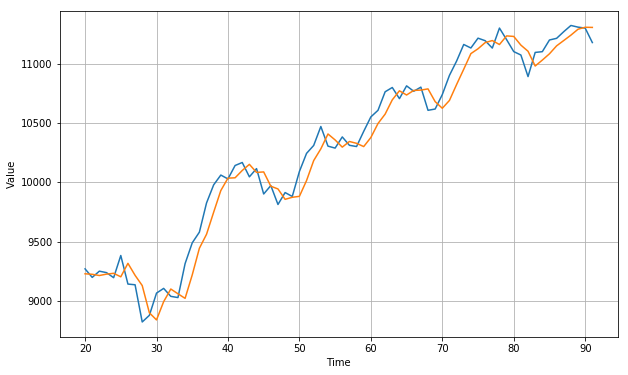

In [12]:
from nsepy import get_history

#Predictions on validation data
start_valid = datetime(2020,4,1)
end_valid = datetime.now()
nifty_raw_valid = np.array(get_history('NIFTY',start_valid,end_valid,index=True)['Close'])
nifty_valid = nifty_raw_valid/nifty_range
time_valid = np.arange(0,len(nifty_valid),1)

forecast = []
for time in range(len(nifty_valid) - window_size):
    forecast.append(model.predict(nifty_valid[time:time + window_size][np.newaxis]))

#forecast = forecast[split_time-window_size:]
results = np.array(forecast)[:, 0, 0]*nifty_range


plt.figure(figsize=(10, 6))

plot_series(time_valid[window_size:],nifty_raw_valid[window_size:])
plot_series(time_valid[window_size:], results)

In [13]:
print(tf.keras.metrics.mean_squared_error(nifty_raw_valid[window_size:], results).numpy())
print(tf.keras.metrics.mean_absolute_error(nifty_raw_valid[window_size:], results).numpy())

17651.795
108.11874


In [14]:
time = len(nifty_valid) - window_size
print("Tomorrow's Prediction :",model.predict(nifty_valid[time:time + window_size][np.newaxis])[0][0]*nifty_range)

Tomorrow's Prediction : 11239.82048034668


In [15]:
"""
dataset = windowed_dataset(nifty_data, window_size, batch_size, shuffle_buffer_size)


model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(10, input_shape=[window_size], activation="relu"), 
    tf.keras.layers.Dense(10, activation="relu"), 
    tf.keras.layers.Dense(1)
])

lr_schedule = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-8 * 10**(epoch / 20))
optimizer = tf.keras.optimizers.SGD(lr=1e-8, momentum=0.9)
model.compile(loss="mse", optimizer=optimizer)
history = model.fit(dataset, epochs=100, callbacks=[lr_schedule])

lrs = 1e-8 * (10 ** (np.arange(100) / 20))
plt.semilogx(lrs, history.history["loss"])
plt.axis([1e-8, 1e-3, 0, 300])

window_size = 30
dataset = windowed_dataset(nifty_data, window_size, batch_size, shuffle_buffer_size)

model = tf.keras.models.Sequential([
  tf.keras.layers.Dense(10, activation="relu", input_shape=[window_size]),
  tf.keras.layers.Dense(10, activation="relu"),
  tf.keras.layers.Dense(1)
])

optimizer = tf.keras.optimizers.SGD(lr=1e-6, momentum=0.9)
model.compile(loss="mse", optimizer=optimizer)
history = model.fit(dataset, epochs=50)

loss = history.history['loss']
epochs = range(len(loss))
plt.plot(epochs, loss, 'b', label='Training Loss')
plt.show()

# Plot all but the first 10
loss = history.history['loss']
epochs = range(10, len(loss))
plot_loss = loss[10:]
plt.plot(epochs, plot_loss, 'b', label='Training Loss')
plt.show()

forecast = []
for time in range(len(nifty_data) - window_size):
    forecast.append(model.predict(nifty_data[time:time + window_size][np.newaxis]))

#forecast = forecast[split_time-window_size:]
results = np.array(forecast)[:, 0, 0]


plt.figure(figsize=(10, 6))

plot_series(time_array[window_size:],nifty_data[window_size:]*1000)
plot_series(time_array[window_size:], results*1000)
"""

'\ndataset = windowed_dataset(nifty_data, window_size, batch_size, shuffle_buffer_size)\n\n\nmodel = tf.keras.models.Sequential([\n    tf.keras.layers.Dense(10, input_shape=[window_size], activation="relu"), \n    tf.keras.layers.Dense(10, activation="relu"), \n    tf.keras.layers.Dense(1)\n])\n\nlr_schedule = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-8 * 10**(epoch / 20))\noptimizer = tf.keras.optimizers.SGD(lr=1e-8, momentum=0.9)\nmodel.compile(loss="mse", optimizer=optimizer)\nhistory = model.fit(dataset, epochs=100, callbacks=[lr_schedule])\n\nlrs = 1e-8 * (10 ** (np.arange(100) / 20))\nplt.semilogx(lrs, history.history["loss"])\nplt.axis([1e-8, 1e-3, 0, 300])\n\nwindow_size = 30\ndataset = windowed_dataset(nifty_data, window_size, batch_size, shuffle_buffer_size)\n\nmodel = tf.keras.models.Sequential([\n  tf.keras.layers.Dense(10, activation="relu", input_shape=[window_size]),\n  tf.keras.layers.Dense(10, activation="relu"),\n  tf.keras.layers.Dense(1)\n])\n\noptim